In [1]:

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1797
1797


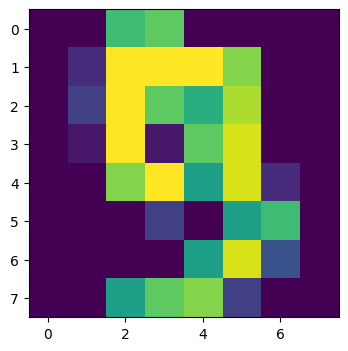

In [2]:
# Required Imports
from sklearn import *
from sklearn.model_selection import *
import torch
import torch.nn as Neurals
import torch.nn.functional as NeuralsFunctional
import torch.optim as optimizer
from matplotlib import pyplot as plt

'''
import torch
import torch.Neurals as Neurals
import torch.Neurals.functional as NeuralsFunctional
import torch.optim as optimizer

'''


Numbers = datasets.load_digits()
plt.imshow(Numbers.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [3]:
NumberCount = {}
for Number in Numbers.target:
    if Number in NumberCount:
        NumberCount[Number] += 1
    else:
        NumberCount[Number] = 1

keys = list(NumberCount.keys())
i = 0

while i < len(keys):
    digit = keys[i]
    count = NumberCount[digit]
    print("Digit", digit, ":", count)
    i += 1

Digit 0: 178
Digit 1: 182
Digit 2: 177
Digit 3: 183
Digit 4: 181
Digit 5: 182
Digit 6: 181
Digit 7: 179
Digit 8: 174
Digit 9: 180


In [4]:

X_train, X_test, y_train, y_test = train_test_split(Numbers.data, Numbers.target, test_size=0.3, random_state=22)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [5]:

class NeuralNetworkNumbers(Neurals.Module):
    def __init__ (self):
        super().__init__()
        self.fc1 = Neurals.Linear(64, 32)
        self.fc2 = Neurals.Linear(32,10)

    def forward(self, X):
        X = X.view(-1, 64)
        X = torch.relu(self.fc1(X))
        X = self.fc2(X)
        return X

digits_model = NeuralNetworkNumbers()
print (digits_model)

NeuralNetSklearnDigits(
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


In [6]:

optimizer = optimizer.Adam(digits_model.parameters(), lr=0.02)

for epoch in range(180):
    optimizer.zero_grad()
    output = digits_model(X_train)
    loss = Neurals.CrossEntropyLoss()(output, y_train)
    loss.backward()
    optimizer.step()

In [7]:

y_pred = digits_model(X_test)
accuracy = accuracy_score(y_test, torch.argmax(y_pred, axis=1))
print("Test accuracy =", accuracy*100)

Test accuracy: 0.9666666666666667


# Extra Credit Assignment

In [8]:

import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split

In [9]:
# create a new class by inheriting the Dataset class.
class CustomImgDataset(Dataset):
    # constructor
    def __init__(self, path, transform=None):
        # directory where images were present
        self.path = path
        # get all the files in the path dir
        self.image_paths = os.listdir(path)
        # remove the uNeuralsecessary DS_Store file
        self.image_paths.remove(".DS_Store")
        self.transform = transform
    
    # modifying the inherited methods
    def __getitem__(self, index):
        # open the image using PIL
        image = Image.open(os.path.join(self.path, self.image_paths[index]))
        # use a function to set the target class
        target = self.set_target_class(self.image_paths[index])
        # transform the image
        if self.transform is not None:
            image = self.transform(image)
        return image, target
    
    # total no. of samples
    def __len__(self):
        return len(self.image_paths)
    
    # NeuralsFunctionalunction to set target class as Burn(1) or Not Burn(0)
    # based on the filename.
    # filename = img1-62.jpg - Burn(1) else Not Burn(0)
    def set_target_class(self, filename):
        # Prepare a list of image names - img1-62.jpg
        burnList = [ f'img{idx}.jpg' for idx in range(1, 62+1)]
        # Check if the given filename is present to set Burn
        if filename in burnList:
            return 1
        # Else Not Burn
        else:
            return 0

# Image transformations
# resize and normalize the image
transform = transforms.Compose([
    # resize
    transforms.Resize((200,200)),
    # convert to tensor
    transforms.ToTensor(),
    # normalize
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# DIR for the burnimages dataset
path = "BurnImages"

dataset = CustomImgDataset(path, transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
import os
from PIL import Image

# Set the path to the directory containing the images
directory = 'path/to/images'

# Create an empty list to store the image filenames
image_filenames = []

# Loop through all the image filenames
for i in range(1, 63):
    # Construct the filename for the current image
    filename = os.path.join(directory, 'burn', f'img{i}.jpg')
    
    # Add the filename to the list
    image_filenames.append(filename)

# Loop through the list of image filenames
for filename in image_filenames:
    # Open the image file
    image = Image.open(filename)
    
    # Display the image
    image.show()


In [10]:
# set train and test sizes
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
# Split dataset into train and test sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size],
                                           generator=torch.Generator().manual_seed(42))

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=0)

In [11]:
# CNeurals - Convolution neural network
class BurnCNeurals(Neurals.Module):
    def __init__(self):
        super(BurnCNeurals, self).__init__()
        self.conv1 = Neurals.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = Neurals.BatchNorm2d(32)
        self.conv2 = Neurals.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = Neurals.BatchNorm2d(64)
        self.conv3 = Neurals.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = Neurals.BatchNorm2d(128)
        self.fc1 = Neurals.Linear(128*50*50, 256)
        self.fc2 = Neurals.Linear(256, 1)

    def forward(self, x):
        x = NeuralsFunctional.relu(self.bn1(self.conv1(x)))
        x = NeuralsFunctional.max_pool2d(NeuralsFunctional.relu(self.bn2(self.conv2(x))), 2)
        x = NeuralsFunctional.max_pool2d(NeuralsFunctional.relu(self.bn3(self.conv3(x))), 2)
        x = x.view(-1, 128*50*50)
        x = NeuralsFunctional.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()

In [12]:
# instantiate the convolution neural network
cNeurals = BurnCNeurals()

# setup loss function and optimizer
criterion = Neurals.BCEWithLogitsLoss()
optimizer = optimizer.Adam(cNeurals.parameters())

# train the neural network
num_epochs = 5
# no. of iterations/epochs to loop
for epoch in range(num_epochs):
    ruNeuralsing_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # zero the param gradients
        optimizer.zero_grad()
        # forward -> backward -> optimize
        outputs = cNeurals(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print some loss statistics
        ruNeuralsing_loss += loss.item()
        if i % 4 == 2:
            print(f'[{epoch+1:5d}, {i+1:5d}] loss: {ruNeuralsing_loss/10:.3f}')
            ruNeuralsing_loss = 0.0

[    1,     3] loss: 14.605
[    2,     3] loss: 0.540
[    3,     3] loss: 0.971
[    4,     3] loss: 0.255
[    5,     3] loss: 0.183


In [13]:
# test the neural network
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = cNeurals(images)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(test_dataset)} test images: {100*correct/total:.2f}%.')

Accuracy of the network on the 18 test images: 88.89%.
